In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import raytrace as rt
import numpy as np
import math
from pylab import *
from raytrace import implane
import rtcore
import pickle

In [6]:
freq_list = [10.e6, 18.e6, 40.e6, 80.e6, 200.e6, 3000.e6] # Hz, radio wave frequency
z_heights = [0.18, 0.67]   # solar radii
grid=(100,100)
rect=(-1, -1, 1, 1)
obs=(215, 0, 0)  # Position of the observer (the earth's coordinates) in SGI system
rsph = 10  # Radius of the integrarion sphere
niter = 1500  #The maximum iterations to perform using the algorithm

In [ ]:
nx = int(grid[0])
ny = int(grid[1])

# Image plane grid
ymin, ymax = -1.0, 1.0
zmin, zmax = -1.0, 1.0

y = np.linspace(ymin, ymax, nx)
z = np.linspace(zmin, zmax, ny)

# choose Y ~ 0
iy = np.argmin(np.abs(y-0.0))

print 'Chosen Y index:', iy

# -----------------------------------------------------
# STORAGE DICTIONARY
# -----------------------------------------------------
all_data = {}

for z0 in z_heights:

    iz = np.argmin(np.abs(z - z0))
    trkrays = [[iy, iz]]

    for freq_hz in freq_list:

        print 'Running freq =', freq_hz/1e6, 'MHz at Z=', z0

        test1 = rt.implane(grid,
                           rect,
                           obs,
                           rsph,
                           freq=freq_hz,
                           mode='TbrIQUV',
                           trkparms=['pos'],
                           trknpmax=1500)

        test1.package = '/home/hp/raytrace/py_raytr_threaded'

        test1.trace(niter, trkrays)

        traj = test1.traj.pos.copy()

        key = (z0, freq_hz)
        all_data[key] = traj

        # -------------------------------------------------
        # ASCII SAVE (X Y Z columns)
        # -------------------------------------------------
        fname = 'traj_Z%.2f_F%.0fMHz.txt' % (z0, freq_hz/1e6)

        np.savetxt(fname,
                   np.column_stack((traj[0,:,0],
                                    traj[0,:,1],
                                    traj[0,:,2])),
                   header='X Y Z')

# -----------------------------------------------------
# SAVE PICKLE FILE
# -----------------------------------------------------
f = open('all_ray_trajectories.pkl','wb')
pickle.dump(all_data, f, protocol=2)   # protocol=2 safe for Py2
f.close()

print 'Saved file: all_ray_trajectories.pkl'

Chosen Y index: 49
Running freq = 10.0 MHz at Z= 0.18
plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so
Running freq = 18.0 MHz at Z= 0.18
plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_script

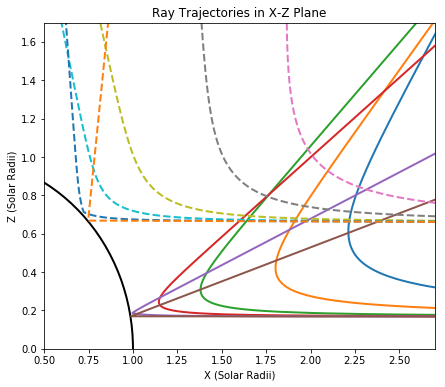

In [9]:
# =====================================================
# LOAD PICKLE AND PLOT XZ TRAJECTORIES
# =====================================================

import numpy as np
import pickle
import matplotlib.pyplot as plt

freq_list = [10.e6, 18.e6, 40.e6, 80.e6, 200.e6, 3000.e6]
z_heights = [0.18, 0.67]

# -----------------------------------------------------
# LOAD DATA
# -----------------------------------------------------
f = open('all_ray_trajectories.pkl','rb')
all_data = pickle.load(f)
f.close()

# -----------------------------------------------------
# PLOT
# -----------------------------------------------------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)

for z0 in z_heights:

    if z0 == z_heights[0]:
        style = '-'
    else:
        style = '--'

    for freq_hz in freq_list:

        key = (z0, freq_hz)
        traj = all_data[key]

        ax.plot(traj[0,:,0],
                traj[0,:,2],
                linestyle=style,
                linewidth=2,
                label='%.0f MHz (Z=%.2fR)' % (freq_hz/1e6, z0))

# -----------------------------------------------------
# DRAW SUN
# -----------------------------------------------------
sun = plt.Circle((0.0,0.0),1.0,fill=False,linewidth=2)
ax.add_patch(sun)

ax.set_xlabel('X (Solar Radii)')
ax.set_ylabel('Z (Solar Radii)')
ax.set_title('Ray Trajectories in X-Z Plane')

ax.set_xlim(0.5,2.7)
ax.set_ylim(0,1.7)

#ax.legend()
plt.show()